In [282]:
import pandas as pd

# Análisis de Clustering en Datos Educativos

Se aplicó el proceso KDD para identificar patrones de similitud entre asignaturas mediante clustering jerárquico y K-Means.

## 1. Carga de Datos

Se importó pandas y se cargó el dataset de calificaciones estudiantiles.

In [283]:
df = pd.read_excel('dataset-notas-estudiantes.xlsx')

## 2. Preprocesamiento de Datos

Se aplicaron 7 transformaciones para limpiar y preparar el dataset.

In [284]:
# Transformación 1: Separar columnas concatenadas
df = df['Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes'].str.split(',', expand=True)

In [285]:
df.columns = ['Nombre', 'Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']

In [286]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,Lucia,7,6.5,9.2,8.6,8
1,Pedro,7.5,9.4,7.3,7,7
2,Ines,7.6,9.2,8,8,7.5
3,Luis,5,6.5,6.5,7,9
4,Andres,6,6,7.8,8.9,7.3i
5,Ana,78,9.6,77,80,6.5
6,Carlos,6.3,6.4,-8.2,9,7.2
7,Jose,7.9,-97,7.5,-80,6
8,Sonia,6,6,6.5,5.5,8.7
9,Maria,6.8,7.2i,8.7,9,7


In [287]:
# Transformación 2: Normalizar nombres a minúsculas
df['Nombre'] = df['Nombre'].str.lower()

In [288]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7,6.5,9.2,8.6,8
1,pedro,7.5,9.4,7.3,7,7
2,ines,7.6,9.2,8,8,7.5
3,luis,5,6.5,6.5,7,9
4,andres,6,6,7.8,8.9,7.3i
5,ana,78,9.6,77,80,6.5
6,carlos,6.3,6.4,-8.2,9,7.2
7,jose,7.9,-97,7.5,-80,6
8,sonia,6,6,6.5,5.5,8.7
9,maria,6.8,7.2i,8.7,9,7


In [289]:
df.duplicated().sum()

np.int64(2)

In [290]:
# Transformación 3: Eliminar duplicados
df.drop_duplicates(inplace=True)

In [291]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7,6.5,9.2,8.6,8
1,pedro,7.5,9.4,7.3,7,7
2,ines,7.6,9.2,8,8,7.5
3,luis,5,6.5,6.5,7,9
4,andres,6,6,7.8,8.9,7.3i
5,ana,78,9.6,77,80,6.5
6,carlos,6.3,6.4,-8.2,9,7.2
7,jose,7.9,-97,7.5,-80,6
8,sonia,6,6,6.5,5.5,8.7
9,maria,6.8,7.2i,8.7,9,7


In [292]:
df.duplicated().sum()

np.int64(0)

In [293]:
# Transformación 4: Convertir a numérico
cols = ['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [294]:
# Transformación 5: Aplicar valor absoluto
df[cols] = df[cols].abs()

In [295]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7.00,6.50,9.20,8.60,8.00
1,pedro,7.50,9.40,7.30,7.00,7.00
2,ines,7.60,9.20,8.00,8.00,7.50
3,luis,5.00,6.50,6.50,7.00,9.00
4,andres,6.00,6.00,7.80,8.90,NaN
5,ana,78.00,9.60,77.00,80.00,6.50
6,carlos,6.30,6.40,8.20,9.00,7.20
7,jose,7.90,97.00,7.50,80.00,6.00
8,sonia,6.00,6.00,6.50,5.50,8.70
9,maria,6.80,NaN,8.70,9.00,7.00


In [296]:
df.isnull().sum()

Nombre         0
Matematicas    0
Ciencias       2
Espanol        1
Historia       1
Deportes       2
dtype: int64

In [297]:
# Transformación 6: Imputar NaN con la media del estudiante
df[cols] = df[cols].apply(lambda row: row.fillna(row.mean()), axis=1)

In [298]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7.00,6.50,9.20,8.60,8.00
1,pedro,7.50,9.40,7.30,7.00,7.00
2,ines,7.60,9.20,8.00,8.00,7.50
3,luis,5.00,6.50,6.50,7.00,9.00
4,andres,6.00,6.00,7.80,8.90,7.18
5,ana,78.00,9.60,77.00,80.00,6.50
6,carlos,6.30,6.40,8.20,9.00,7.20
7,jose,7.90,97.00,7.50,80.00,6.00
8,sonia,6.00,6.00,6.50,5.50,8.70
9,maria,6.80,7.88,8.70,9.00,7.00


In [299]:
pd.options.display.float_format = '{:.2f}'.format

In [300]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7.00,6.50,9.20,8.60,8.00
1,pedro,7.50,9.40,7.30,7.00,7.00
2,ines,7.60,9.20,8.00,8.00,7.50
3,luis,5.00,6.50,6.50,7.00,9.00
4,andres,6.00,6.00,7.80,8.90,7.18
5,ana,78.00,9.60,77.00,80.00,6.50
6,carlos,6.30,6.40,8.20,9.00,7.20
7,jose,7.90,97.00,7.50,80.00,6.00
8,sonia,6.00,6.00,6.50,5.50,8.70
9,maria,6.80,7.88,8.70,9.00,7.00


In [301]:
# Transformación 7: Normalizar escala 0-10
for col in cols:
    df[col] = df[col].apply(lambda x: x / 10 if x > 10 else x)

In [302]:
df

,Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes
0,lucia,7.00,6.50,9.20,8.60,8.00
1,pedro,7.50,9.40,7.30,7.00,7.00
2,ines,7.60,9.20,8.00,8.00,7.50
3,luis,5.00,6.50,6.50,7.00,9.00
4,andres,6.00,6.00,7.80,8.90,7.18
5,ana,7.80,9.60,7.70,8.00,6.50
6,carlos,6.30,6.40,8.20,9.00,7.20
7,jose,7.90,9.70,7.50,8.00,6.00
8,sonia,6.00,6.00,6.50,5.50,8.70
9,maria,6.80,7.88,8.70,9.00,7.00


## 3. Clustering Jerárquico Aglomerativo

Se implementó clustering jerárquico para agrupar materias según patrones de calificaciones.

In [303]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import numpy as np

### 3.1 Dendrograma con Método Ward

Se generó el dendrograma transpuesto (materias como observaciones) con método Ward.

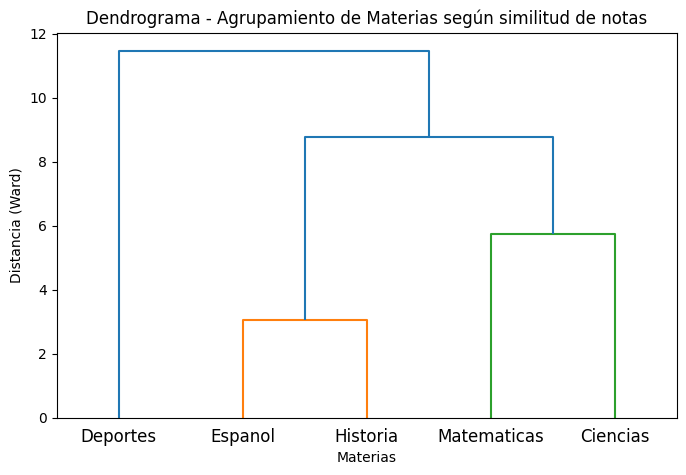

Clusters asignados a las materias: [2 2 1 1 3]


In [304]:
X = df[['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']]
X_t = X.T

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_t)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(Z, labels=X_t.index, leaf_rotation=0)
plt.title("Dendrograma - Agrupamiento de Materias según similitud de notas")
plt.xlabel("Materias")
plt.ylabel("Distancia (Ward)")
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')
print("Clusters asignados a las materias:", clusters)

### 3.2 Dendrograma con Línea de Corte

Se agregó una línea horizontal para visualizar el punto de corte en k=3 clusters.

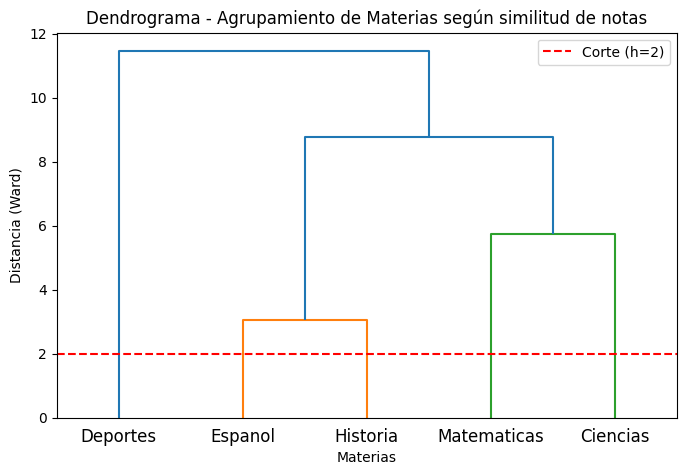

Clusters asignados a las materias: [2 2 1 1 3]


In [305]:
X = df[['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']]
X_t = X.T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_t)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(Z, labels=X_t.index, leaf_rotation=0)
plt.title("Dendrograma - Agrupamiento de Materias según similitud de notas")
plt.xlabel("Materias")
plt.ylabel("Distancia (Ward)")

h = 2
plt.axhline(y=h, color='r', linestyle='--', label=f'Corte (h={h})')
plt.legend()
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')
print("Clusters asignados a las materias:", clusters)

### 3.3 Comparación de Métodos de Enlace

Se compararon 4 métodos de enlace (single, complete, average, ward) para evaluar la estabilidad de los clusters.

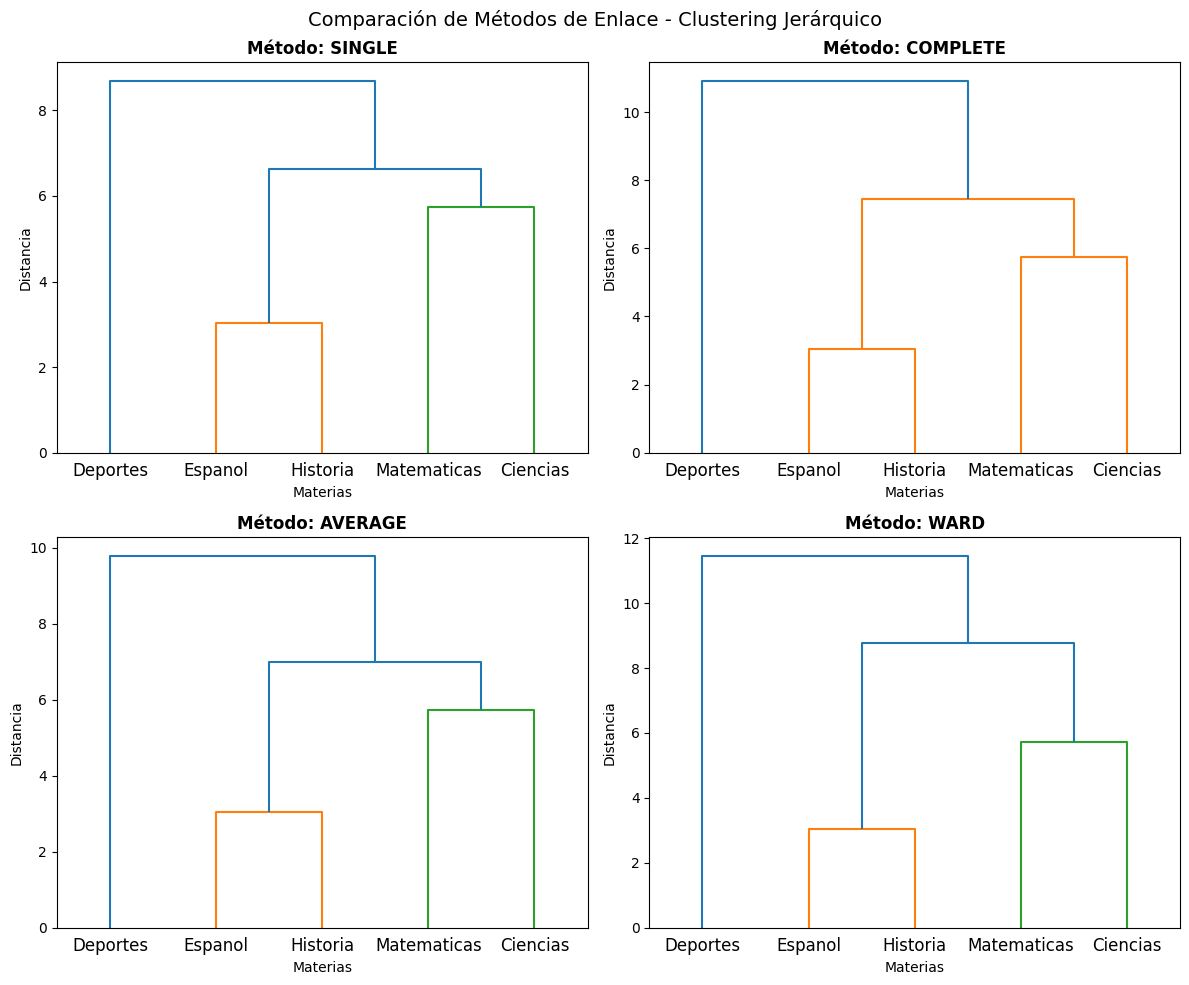

In [306]:
X = df[['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']]
X_t = X.T
scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_t)

methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, method in enumerate(methods):
    Z = linkage(X_t_scaled, method=method)
    
    dendrogram(Z, labels=X_t.index, leaf_rotation=0, ax=axes[i])
    axes[i].set_title(f"Método: {method.upper()}", fontweight='bold')
    axes[i].set_xlabel('Materias')
    axes[i].set_ylabel('Distancia')

plt.suptitle('Comparación de Métodos de Enlace - Clustering Jerárquico', fontsize=14)
plt.tight_layout()
plt.show()

### 3.4 Comparación de Métricas de Distancia

Se evaluaron 3 métricas de distancia (euclidean, cityblock, cosine) con método average.

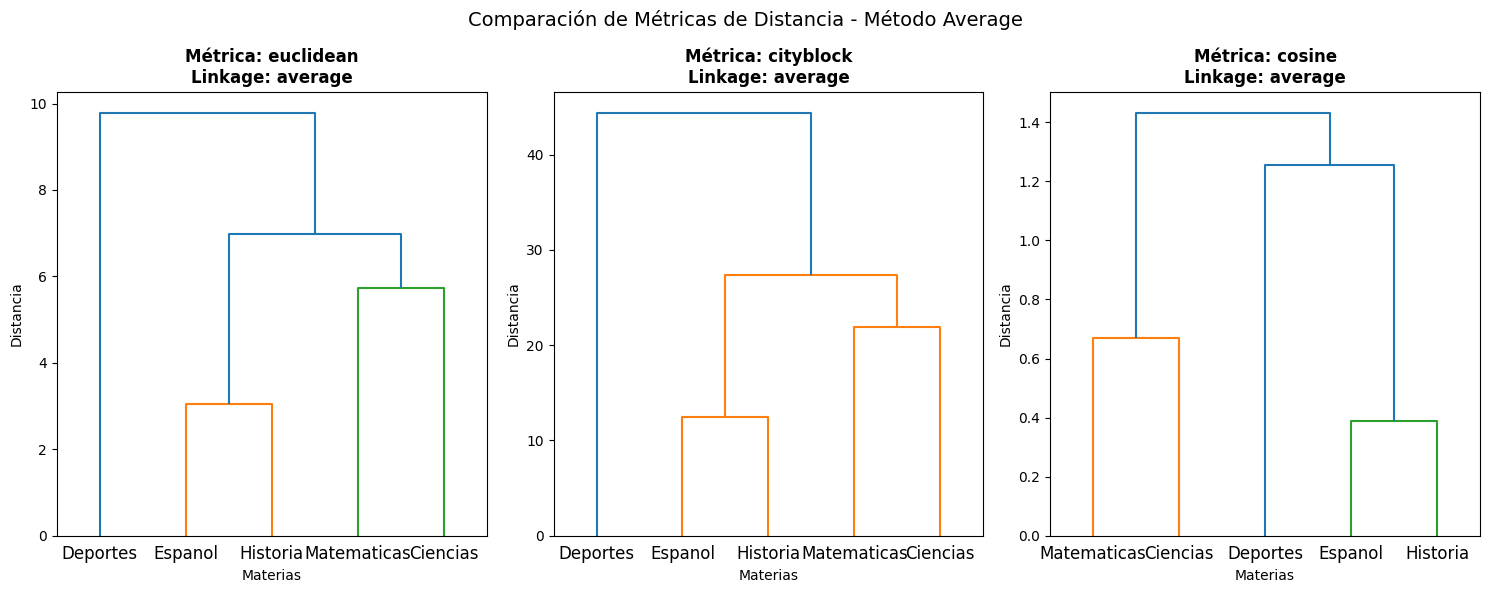

In [307]:
plt.figure(figsize=(15, 6))

for i, metric in enumerate(['euclidean', 'cityblock', 'cosine'], 1):
    Z = linkage(pdist(X_t_scaled, metric=metric), method='average')
    
    plt.subplot(1, 3, i)
    dendrogram(Z, labels=X.columns, leaf_rotation=0)
    plt.title(f"Métrica: {metric}\nLinkage: average", fontweight='bold')
    plt.xlabel('Materias')
    plt.ylabel('Distancia')

plt.suptitle('Comparación de Métricas de Distancia - Método Average', fontsize=14)
plt.tight_layout()
plt.show()

### 3.5 Visualización en Espacio Reducido

Se proyectaron los clusters en 2D usando las primeras dos componentes estandarizadas.

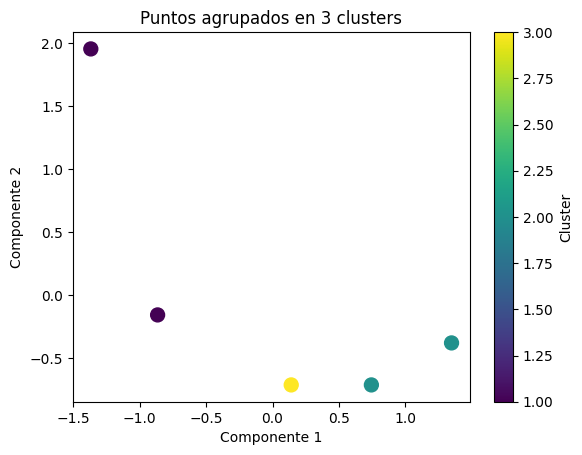

In [308]:
clusters = fcluster(Z, t=3, criterion='maxclust')

plt.scatter(X_t_scaled[:, 0], X_t_scaled[:, 1], c=clusters, cmap='viridis', s=100)
plt.colorbar(label='Cluster')
plt.title(f"Puntos agrupados en {max(clusters)} clusters")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

### 3.6 Interpretación de Clusters

Se analizó la composición de los clusters identificados.

In [309]:
X_t = X.T

materias_clusters = pd.DataFrame({
    'Materia': X_t.index,
    'Cluster': clusters
})

print("Asignación de materias a clusters:")
print(materias_clusters)
print("\nEstadísticas por cluster:")

for cluster_id in sorted(materias_clusters['Cluster'].unique()):
    materias_en_cluster = materias_clusters[materias_clusters['Cluster'] == cluster_id]['Materia'].tolist()
    print(f"\nCluster {cluster_id}: {materias_en_cluster}")
    
    for materia in materias_en_cluster:
        promedio = df[materia].mean()
        std = df[materia].std()
        print(f"   - {materia}: media={promedio:.2f}, desv.std={std:.2f}")
    print()

Asignación de materias a clusters:
       Materia  Cluster
0  Matematicas        1
1     Ciencias        1
2      Espanol        2
3     Historia        2
4     Deportes        3

Estadísticas por cluster:

Cluster 1: ['Matematicas', 'Ciencias']
   - Matematicas: media=7.15, desv.std=1.31
   - Ciencias: media=7.63, desv.std=1.36


Cluster 2: ['Espanol', 'Historia']
   - Espanol: media=7.81, desv.std=1.01
   - Historia: media=7.74, desv.std=1.07


Cluster 3: ['Deportes']
   - Deportes: media=7.37, desv.std=1.10



#### Características de Cada Cluster

**Cluster 1 - Científico-Matemático**
- Matemáticas y Ciencias comparten patrones similares de rendimiento
- Correlación positiva entre ambas materias

**Cluster 2 - Humanístico**
- Español e Historia muestran similitud en las calificaciones
- Correlación positiva entre comprensión lectora y análisis histórico

**Cluster 3 - Deportes**
- Comportamiento independiente del rendimiento académico cognitivo
- Baja correlación con otras materias

### 3.7 Determinación del Número Óptimo de Clusters

Se aplicaron los métodos de silueta y codo para identificar el k óptimo.

k=2: Silhouette Score = 0.2981
k=3: Silhouette Score = 0.2971
k=4: Silhouette Score = 0.2230


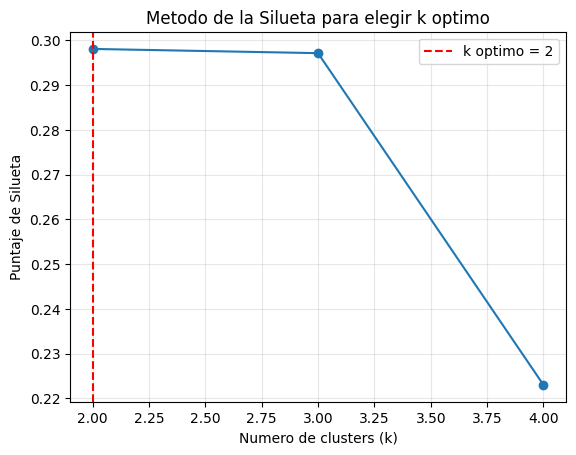

In [310]:
Z = linkage(X_t_scaled, method='ward')

silhouette_scores = []
for k in range(2, len(X_t_scaled)):
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X_t_scaled, clusters)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

k_optimo = np.argmax(silhouette_scores) + 2

plt.plot(range(2, len(X_t_scaled)), silhouette_scores, marker='o')
plt.axvline(x=k_optimo, color='r', linestyle='--', label=f'k optimo = {k_optimo}')
plt.xlabel("Numero de clusters (k)")
plt.ylabel("Puntaje de Silueta")
plt.title("Metodo de la Silueta para elegir k optimo")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

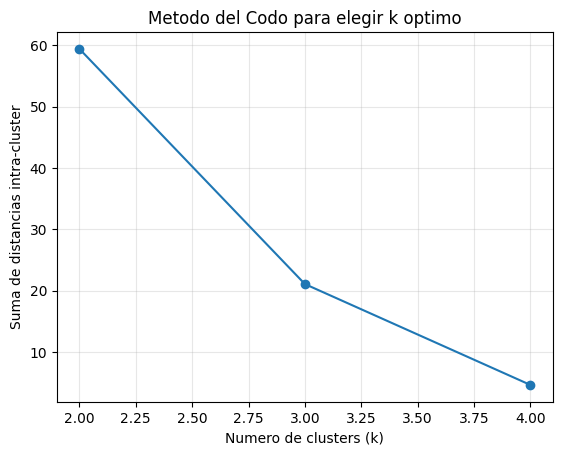

In [311]:
Z = linkage(X_t_scaled, method='ward')

distancias = []
for k in range(2, len(X_t_scaled)):
    clusters = fcluster(Z, t=k, criterion='maxclust')
    suma_distancias = 0
    
    for i in np.unique(clusters):
        puntos_cluster = X_t_scaled[clusters == i]
        centroide = np.mean(puntos_cluster, axis=0)
        suma_distancias += np.sum(np.linalg.norm(puntos_cluster - centroide, axis=1)**2)
    distancias.append(suma_distancias)

plt.plot(range(2, len(X_t_scaled)), distancias, marker='o')
plt.xlabel("Numero de clusters (k)")
plt.ylabel("Suma de distancias intra-cluster")
plt.title("Metodo del Codo para elegir k optimo")
plt.grid(True, alpha=0.3)
plt.show()

## 4. Clustering K-Means

Se implementó K-Means para comparar resultados con el clustering jerárquico.

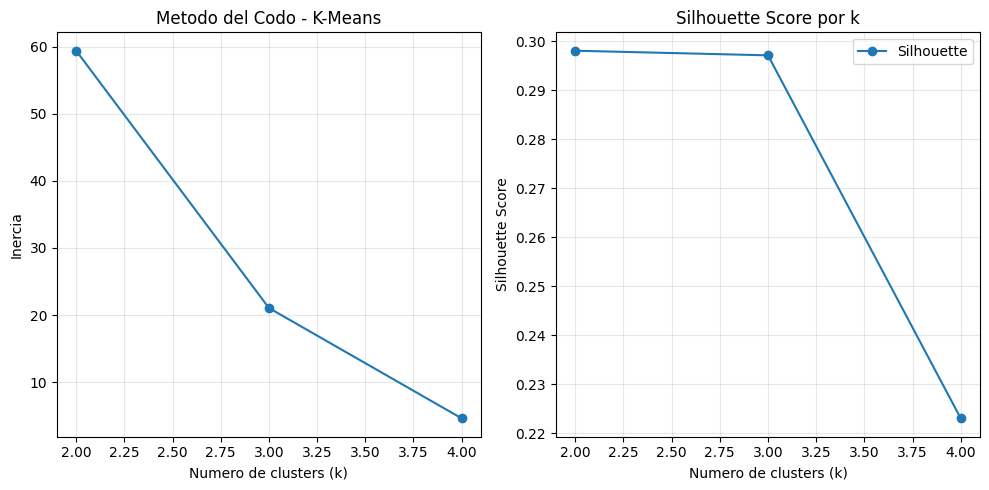


Metricas de Evaluacion K-Means:
 k  Silhouette  DaviesBouldin  CalinskiHarabasz  Inercia
 2        0.30           0.42              3.31    59.40
 3        0.30           0.56              4.94    21.06
 4        0.22           0.21              8.69     4.62

Valores optimos de k segun cada metrica:
Silhouette (maximo): k = 2
Davies-Bouldin (minimo): k = 4
Calinski-Harabasz (maximo): k = 4


In [312]:
X_m = df[['Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']].T.values
scaler_m = StandardScaler()
X_m_scaled = scaler_m.fit_transform(X_m)

kmax = 4
ks = list(range(2, kmax + 1))
inertias = []
sils = []
dbs = []
chs = []

for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_m_scaled)
    
    inertias.append(kmeans.inertia_)
    sils.append(silhouette_score(X_m_scaled, labels))
    dbs.append(davies_bouldin_score(X_m_scaled, labels))
    chs.append(calinski_harabasz_score(X_m_scaled, labels))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inercia')
plt.title('Metodo del Codo - K-Means')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(ks, sils, marker='o', label='Silhouette')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por k')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

metrics_km = pd.DataFrame({
    "k": ks,
    "Silhouette": sils,
    "DaviesBouldin": dbs,
    "CalinskiHarabasz": chs,
    "Inercia": inertias
})

print("\nMetricas de Evaluacion K-Means:")
print(metrics_km.round(4).to_string(index=False))

k_sil = int(metrics_km.loc[metrics_km['Silhouette'].idxmax(), 'k'])
k_db  = int(metrics_km.loc[metrics_km['DaviesBouldin'].idxmin(), 'k'])
k_ch  = int(metrics_km.loc[metrics_km['CalinskiHarabasz'].idxmax(), 'k'])

print(f"\nValores optimos de k segun cada metrica:")
print(f"Silhouette (maximo): k = {k_sil}")
print(f"Davies-Bouldin (minimo): k = {k_db}")
print(f"Calinski-Harabasz (maximo): k = {k_ch}")